# 13F Filings Data Exploration

This notebook provides a comprehensive exploration of the processed 13F filings data, including data quality assessment, basic statistics, and initial insights.

## Table of Contents
1. [Data Loading and Overview](#data-loading)
2. [Data Quality Assessment](#data-quality)
3. [Basic Statistics](#basic-stats)
4. [Time Period Analysis](#time-analysis)
5. [Security Type Distribution](#security-types)
6. [Market Value Analysis](#market-values)
7. [Initial Insights](#insights)


In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:,.2f}'.format)

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Data Loading and Overview {#data-loading}


In [4]:
# Load the processed data
print("Loading processed data...")

# Load main datasets
holdings = pd.read_parquet('../processed_data/combined_holdings.parquet')
managers = pd.read_parquet('../processed_data/manager_summary.parquet')
securities = pd.read_parquet('../processed_data/security_summary.parquet')
sectors = pd.read_parquet('../processed_data/sector_summary.parquet')

print(f"✅ Holdings data loaded: {len(holdings):,} records")
print(f"✅ Manager summary loaded: {len(managers):,} records")
print(f"✅ Security summary loaded: {len(securities):,} records")
print(f"✅ Sector summary loaded: {len(sectors):,} records")


Loading processed data...
✅ Holdings data loaded: 4,488,519 records
✅ Manager summary loaded: 10,163 records
✅ Security summary loaded: 214,262 records
✅ Sector summary loaded: 14 records


In [5]:
# Display basic information about each dataset
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)

datasets = {
    'Holdings': holdings,
    'Managers': managers,
    'Securities': securities,
    'Sectors': sectors
}

for name, df in datasets.items():
    print(f"\n{name} Dataset:")
    print(f"  Shape: {df.shape}")
    print(f"  Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
    print(f"  Columns: {list(df.columns)}")


DATASET OVERVIEW

Holdings Dataset:
  Shape: (4488519, 30)
  Memory usage: 4204.6 MB
  Columns: ['ACCESSION_NUMBER', 'INFOTABLE_SK', 'issuer_name', 'security_class', 'cusip', 'figi', 'market_value', 'shares_or_principal', 'amount_type', 'put_call', 'investment_discretion', 'other_manager', 'voting_sole', 'voting_shared', 'voting_none', 'issuer_name_clean', 'total_voting_authority', 'security_type', 'has_figi', 'is_option', 'has_other_manager', 'manager_name', 'report_date', 'report_type', 'is_amendment_bool', 'total_entries', 'total_value', 'other_managers_count', 'data_period', 'processed_at']

Managers Dataset:
  Shape: (10163, 9)
  Memory usage: 2.2 MB
  Columns: ['manager_name', 'data_period', 'total_market_value', 'total_holdings', 'avg_holding_value', 'unique_issuers', 'unique_securities', 'total_voting_shares', 'amendment_count']

Securities Dataset:
  Shape: (214262, 10)
  Memory usage: 58.6 MB
  Columns: ['issuer_name', 'cusip', 'data_period', 'total_market_value', 'holding_co

In [6]:
# Display first few rows of each dataset
print("\n" + "=" * 60)
print("SAMPLE DATA")
print("=" * 60)

print("\nHoldings Data (first 5 rows):")
display(holdings.head())

print("\nManager Summary (first 5 rows):")
display(managers.head())

print("\nSecurity Summary (first 5 rows):")
display(securities.head())

print("\nSector Summary:")
display(sectors)



SAMPLE DATA

Holdings Data (first 5 rows):


,ACCESSION_NUMBER,INFOTABLE_SK,issuer_name,security_class,cusip,figi,market_value,shares_or_principal,amount_type,put_call,investment_discretion,other_manager,voting_sole,voting_shared,voting_none,issuer_name_clean,total_voting_authority,security_type,has_figi,is_option,has_other_manager,manager_name,report_date,report_type,is_amendment_bool,total_entries,total_value,other_managers_count,data_period,processed_at
0,0002010029-25-000002,118784281,3M CO,COM,88579Y101,None,"7,377.00",48,SH,None,SOLE,0,0,0,48,3M CO,48,COMMON_STOCK,False,False,True,EVOLUTION WEALTH MANAGEMENT INC.,2025-06-30,13F COMBINATION REPORT,False,579,81166387,0,01JUN2025-31AUG2025_form13f,2025-09-28 13:19:03.139204
1,0002010029-25-000002,118784282,ABBOTT LABS,COM,002824100,None,"90,855.00",668,SH,None,SOLE,0,0,0,668,ABBOTT LABS,668,COMMON_STOCK,False,False,True,EVOLUTION WEALTH MANAGEMENT INC.,2025-06-30,13F COMBINATION REPORT,False,579,81166387,0,01JUN2025-31AUG2025_form13f,2025-09-28 13:19:03.139204
2,0002010029-25-000002,118784283,ABBVIE INC,COM,00287Y109,None,"25,987.00",140,SH,None,SOLE,0,0,0,140,ABBVIE INC,140,COMMON_STOCK,False,False,True,EVOLUTION WEALTH MANAGEMENT INC.,2025-06-30,13F COMBINATION REPORT,False,579,81166387,0,01JUN2025-31AUG2025_form13f,2025-09-28 13:19:03.139204
3,0002010029-25-000002,118784284,ABRDN HEALTHCARE OPPORTUNITI,SHS,879105104,None,"14,822.00",806,SH,None,SOLE,0,0,0,806,ABRDN HEALTHCARE OPPORTUNITI,806,OTHER,False,False,True,EVOLUTION WEALTH MANAGEMENT INC.,2025-06-30,13F COMBINATION REPORT,False,579,81166387,0,01JUN2025-31AUG2025_form13f,2025-09-28 13:19:03.139204
4,0002010029-25-000002,118784285,ADIENT PLC,ORD SHS,G0084W101,None,39.00,2,SH,None,SOLE,0,0,0,2,ADIENT PLC,2,COMMON_STOCK,False,False,True,EVOLUTION WEALTH MANAGEMENT INC.,2025-06-30,13F COMBINATION REPORT,False,579,81166387,0,01JUN2025-31AUG2025_form13f,2025-09-28 13:19:03.139204



Manager Summary (first 5 rows):


,manager_name,data_period,total_market_value,total_holdings,avg_holding_value,unique_issuers,unique_securities,total_voting_shares,amendment_count
0,&PARTNERS,01JUN2025-31AUG2025_form13f,"13,033,346,956.00",1992,"6,542,844.86",1428,1992,149425335,0
1,&PARTNERS,01mar2025-31may2025_form13f,"9,412,546,381.00",1753,"5,369,393.26",1273,1753,113050928,0
2,1 NORTH WEALTH SERVICES LLC,01mar2025-31may2025_form13f,"216,068,291.00",275,"785,702.88",204,275,3009102,0
3,"1060 Capital, LLC",01JUN2025-31AUG2025_form13f,"49,385,690.00",10,"4,938,569.00",10,10,2045552,0
4,"1060 Capital, LLC",01mar2025-31may2025_form13f,"44,137,314.00",12,"3,678,109.50",11,11,3172251,0



Security Summary (first 5 rows):


,issuer_name,cusip,data_period,total_market_value,holding_count,total_shares,unique_managers,total_voting_sole,total_voting_shared,total_voting_none
0,,000000000,01mar2025-31may2025_form13f,0.00,1,0,1,0,0,0
1,!SHARES TR,464287614,01mar2025-31may2025_form13f,"430,484.00",1,1194,1,1194,0,0
2,#N/A CONNECTION,714920113,01JUN2025-31AUG2025_form13f,0.00,1,64,1,64,0,0
3,#N/A INVALID SECURITY,714920113,01mar2025-31may2025_form13f,0.00,1,64,1,64,0,0
4,#NAME?,00181T107,01JUN2025-31AUG2025_form13f,"1,111.00",1,50094,1,50094,0,0



Sector Summary:


,security_type,data_period,total_market_value,total_holdings,unique_issuers,unique_managers
0,COMMON_STOCK,01JUN2025-31AUG2025_form13f,"16,452,991,458,732.00",691360,32186,2031
1,COMMON_STOCK,01mar2025-31may2025_form13f,"43,155,137,512,985.00",2179649,72810,7404
2,DEBT,01JUN2025-31AUG2025_form13f,"127,560,557,680.00",11050,1273,476
3,DEBT,01mar2025-31may2025_form13f,"235,846,771,442.00",26193,2556,2028
4,FUND,01JUN2025-31AUG2025_form13f,"1,401,983,240,361.00",57302,4139,1040
5,FUND,01mar2025-31may2025_form13f,"3,768,392,188,138.00",241019,19103,5349
6,OPTION,01JUN2025-31AUG2025_form13f,"124,828,220,638.00",16305,2288,96
7,OPTION,01mar2025-31may2025_form13f,"193,769,821,403.00",37377,6320,303
8,OTHER,01JUN2025-31AUG2025_form13f,"6,868,120,688,318.00",272314,21844,1945
9,OTHER,01mar2025-31may2025_form13f,"14,653,986,695,449.00",953784,47270,7206


## 2. Data Quality Assessment {#data-quality}


In [7]:
# Data quality assessment for holdings data
print("=" * 60)
print("DATA QUALITY ASSESSMENT")
print("=" * 60)

# Missing values analysis
print("\nMissing Values Analysis:")
missing_data = holdings.isnull().sum()
missing_percent = (missing_data / len(holdings)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])

# Data types
print("\nData Types:")
print(holdings.dtypes.value_counts())


DATA QUALITY ASSESSMENT

Missing Values Analysis:
                Missing Count  Missing Percentage
put_call              4270191               95.14
figi                  4028151               89.74
other_manager         2269899               50.57
security_class            441                0.01

Data Types:
object            14
int64              9
bool               4
float64            1
datetime64[ns]     1
datetime64[us]     1
Name: count, dtype: int64


In [8]:
# Data completeness metrics
print("\nData Completeness Metrics:")
completeness = {
    'Total Records': len(holdings),
    'Records with Complete CUSIP': len(holdings[holdings['cusip'].notna()]),
    'Records with Market Value': len(holdings[holdings['market_value'].notna()]),
    'Records with Issuer Name': len(holdings[holdings['issuer_name'].notna()]),
    'Records with Manager Name': len(holdings[holdings['manager_name'].notna()]),
    'Records with FIGI': len(holdings[holdings['figi'].notna()]),
    'Records with Options Data': len(holdings[holdings['put_call'].notna()])
}

completeness_df = pd.DataFrame(list(completeness.items()), columns=['Metric', 'Count'])
completeness_df['Percentage'] = (completeness_df['Count'] / len(holdings)) * 100

print(completeness_df)



Data Completeness Metrics:
                        Metric    Count  Percentage
0                Total Records  4488519      100.00
1  Records with Complete CUSIP  4488519      100.00
2    Records with Market Value  4488519      100.00
3     Records with Issuer Name  4488519      100.00
4    Records with Manager Name  4488519      100.00
5            Records with FIGI   460368       10.26
6    Records with Options Data   218328        4.86


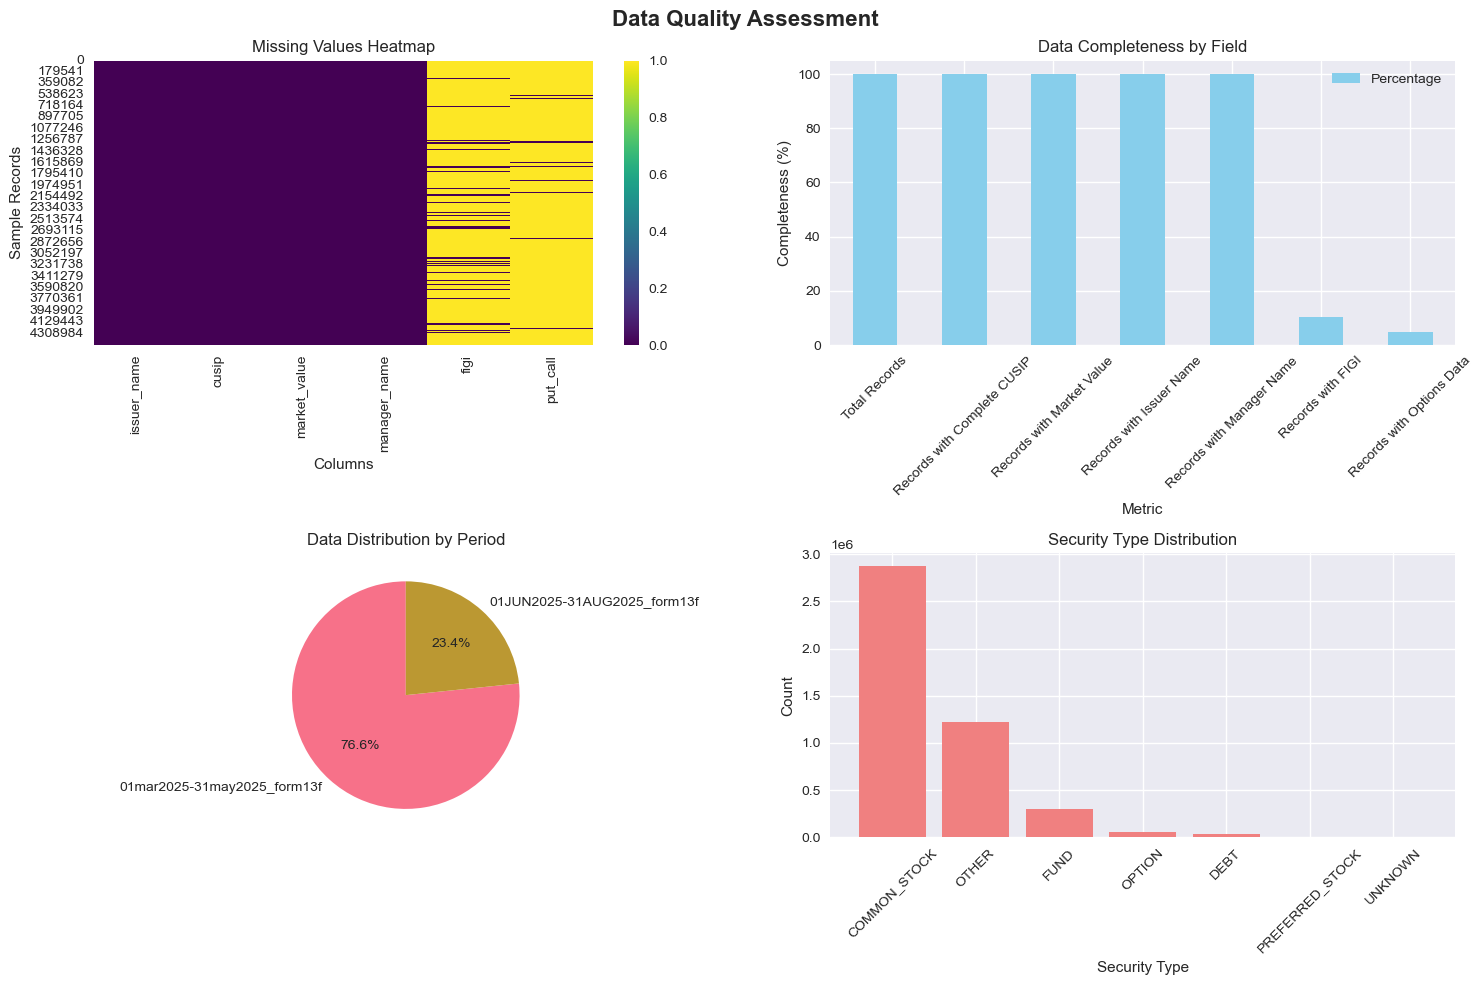

In [9]:
# Data quality visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Data Quality Assessment', fontsize=16, fontweight='bold')

# Missing values heatmap
missing_subset = holdings[['issuer_name', 'cusip', 'market_value', 'manager_name', 'figi', 'put_call']].isnull()
sns.heatmap(missing_subset, cbar=True, ax=axes[0,0], cmap='viridis')
axes[0,0].set_title('Missing Values Heatmap')
axes[0,0].set_xlabel('Columns')
axes[0,0].set_ylabel('Sample Records')

# Completeness bar chart
completeness_df.plot(x='Metric', y='Percentage', kind='bar', ax=axes[0,1], color='skyblue')
axes[0,1].set_title('Data Completeness by Field')
axes[0,1].set_ylabel('Completeness (%)')
axes[0,1].tick_params(axis='x', rotation=45)

# Data period distribution
period_counts = holdings['data_period'].value_counts()
axes[1,0].pie(period_counts.values, labels=period_counts.index, autopct='%1.1f%%', startangle=90)
axes[1,0].set_title('Data Distribution by Period')

# Security type distribution
security_type_counts = holdings['security_type'].value_counts()
axes[1,1].bar(range(len(security_type_counts)), security_type_counts.values, color='lightcoral')
axes[1,1].set_title('Security Type Distribution')
axes[1,1].set_xlabel('Security Type')
axes[1,1].set_ylabel('Count')
axes[1,1].set_xticks(range(len(security_type_counts)))
axes[1,1].set_xticklabels(security_type_counts.index, rotation=45)

plt.tight_layout()
plt.show()


## 3. Basic Statistics {#basic-stats}


In [10]:
# Basic statistics for numerical columns
print("=" * 60)
print("BASIC STATISTICS")
print("=" * 60)

numerical_cols = ['market_value', 'shares_or_principal', 'voting_sole', 'voting_shared', 'voting_none']
print("\nHoldings Data - Numerical Statistics:")
display(holdings[numerical_cols].describe())

# Overall market value statistics
total_market_value = holdings['market_value'].sum()
avg_market_value = holdings['market_value'].mean()
median_market_value = holdings['market_value'].median()

print(f"\nOverall Market Value Statistics:")
print(f"Total Market Value: ${total_market_value:,.0f}")
print(f"Average Holding Value: ${avg_market_value:,.0f}")
print(f"Median Holding Value: ${median_market_value:,.0f}")
print(f"Number of Holdings: {len(holdings):,}")


BASIC STATISTICS

Holdings Data - Numerical Statistics:


,market_value,shares_or_principal,voting_sole,voting_shared,voting_none
count,"4,488,519.00","4,488,519.00","4,488,519.00","4,488,519.00","4,488,519.00"
mean,"19,379,845.92","338,114.04","256,481.18","26,980.53","70,154.33"
std,"420,529,956.40","25,867,414.91","26,469,217.94","838,173.91","2,183,731.95"
min,0.00,0.00,0.00,0.00,0.00
25%,"24,439.00",970.00,0.00,0.00,0.00
50%,"407,114.00","9,815.00",516.00,0.00,0.00
75%,"2,761,948.50","60,433.00","23,492.00",0.00,"1,580.00"
max,"295,485,658,985.00","41,972,885,300.00","41,972,885,300.00","481,585,118.00","2,078,970,522.00"



Overall Market Value Statistics:
Total Market Value: $86,986,806,615,159
Average Holding Value: $19,379,846
Median Holding Value: $407,114
Number of Holdings: 4,488,519


## 4. Key Insights {#insights}


In [11]:
# Key insights and findings
print("=" * 60)
print("KEY INSIGHTS AND FINDINGS")
print("=" * 60)

# Calculate key insights
insights = []

# 1. Data scale
insights.append(f"📊 Dataset Scale: {len(holdings):,} total holdings across {holdings['manager_name'].nunique():,} investment managers")

# 2. Market value
insights.append(f"💰 Total Market Value: ${total_market_value/1e12:.2f} trillion across all holdings")

# 3. Security diversity
insights.append(f"🏢 Security Diversity: {holdings['issuer_name'].nunique():,} unique issuers and {holdings['cusip'].nunique():,} unique securities")

# 4. Dominant security type
security_type_dist = holdings['security_type'].value_counts()
dominant_type = security_type_dist.index[0]
dominant_pct = (security_type_dist.iloc[0] / security_type_dist.sum()) * 100
insights.append(f"📈 Dominant Security Type: {dominant_type} represents {dominant_pct:.1f}% of all holdings")

# 5. Period comparison
period1, period2 = holdings['data_period'].unique()
period1_count = len(holdings[holdings['data_period'] == period1])
period2_count = len(holdings[holdings['data_period'] == period2])
insights.append(f"📅 Period Comparison: {period1} has {period1_count:,} holdings vs {period2} with {period2_count:,} holdings")

# 6. Data quality
cusip_completeness = (len(holdings[holdings['cusip'].notna()]) / len(holdings)) * 100
insights.append(f"✅ Data Quality: {cusip_completeness:.1f}% of holdings have complete CUSIP identifiers")

# 7. Options activity
options_pct = (len(holdings[holdings['put_call'].notna()]) / len(holdings)) * 100
insights.append(f"📊 Options Activity: {options_pct:.1f}% of holdings are options (puts/calls)")

print("\n".join(insights))


KEY INSIGHTS AND FINDINGS
📊 Dataset Scale: 4,488,519 total holdings across 8,079 investment managers
💰 Total Market Value: $86.99 trillion across all holdings
🏢 Security Diversity: 124,130 unique issuers and 38,838 unique securities
📈 Dominant Security Type: COMMON_STOCK represents 64.0% of all holdings
📅 Period Comparison: 01JUN2025-31AUG2025_form13f has 1,048,553 holdings vs 01mar2025-31may2025_form13f with 3,439,966 holdings
✅ Data Quality: 100.0% of holdings have complete CUSIP identifiers
📊 Options Activity: 4.9% of holdings are options (puts/calls)


## Next Steps

This exploration provides a solid foundation for deeper analysis. The next notebooks will focus on:

1. **Investment Manager Analysis** - Deep dive into manager behavior, concentration, and patterns
2. **Security and Holdings Analysis** - Detailed analysis of individual securities and holdings patterns
3. **Market Intelligence** - Sector analysis, trends, and market insights
4. **Advanced Visualizations** - Interactive charts and comprehensive dashboards

Key findings from this exploration:
- The dataset contains comprehensive 13F filing data with good data quality
- Common stocks dominate the holdings, representing the majority of institutional investments
- The data spans two time periods with significant market value representation
- Options activity is present but represents a smaller portion of total holdings
- Manager concentration shows that top managers control significant portions of market value


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:,.2f}'.format)

print("Libraries imported successfully!")


Libraries imported successfully!
